# Trying out 3D vertical viscosity - run01

First run with 3D vertical viscosity. I modified calc_viscosity.F to call calc_3Ddiffusivity.F and set Av=Kv. This run takes the 3D kv file with $10^{-5}m^2s^{-1}$ outside the canyon and $10^{-3} m^2s^{-1}$ within the canyon. It ran for 3 days.


In [1]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import struct
import xarray as xr

In [4]:
# grid files
grid_file = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/3D_viscAz/run01/mnc_0001/grid.t001.nc'
grid = xr.open_dataset(grid_file)

# State and ptracer files for runs with 3D Av
state_file01 = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/3D_viscAz/run01/mnc_0001/state.0000000000.t001.nc'
ptracers_file01 = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/3D_viscAz/run01/mnc_0001/ptracers.0000000000.t001.nc'

state_01 = xr.open_dataset(state_file01)
ptracers_01 = xr.open_dataset(ptracers_file01)

# files for original run with uniform Av
state_file_base = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
ptracers_file_base = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'

state_base = xr.open_dataset(state_file_base)
ptracers_base = xr.open_dataset(ptracers_file_base)

## Top views of u and v

In [35]:
# 3D visc case
u_surf_d1 = state_01.U.isel(Z=5, T=2)
v_surf_d1 = state_01.V.isel(Z=5, T=2)

u_shlf_d1 = state_01.U.isel(Z=25, T=2)
v_shlf_d1 = state_01.V.isel(Z=25, T=2)

# 3D visc -  on day 2
u_surf_d2 = state_01.U.isel(Z=5, T=4)
v_surf_d2 = state_01.V.isel(Z=5, T=4)

u_shlf_d2 = state_01.U.isel(Z=25, T=4)
v_shlf_d2 = state_01.V.isel(Z=25, T=4)

# 3D visc -  on day 3
u_surf_d3 = state_01.U.isel(Z=5, T=6)
v_surf_d3 = state_01.V.isel(Z=5, T=6)

u_shlf_d3 = state_01.U.isel(Z=25, T=6)
v_shlf_d3 = state_01.V.isel(Z=25, T=6)

# 3D visc - below shelf break day 1
u_cny_d1 = state_01.U.isel(Z=32, T=2)
v_cny_d1 = state_01.V.isel(Z=32, T=2)

# 3D visc - below shelf break, day 2
u_cny_d2 = state_01.U.isel(Z=32, T=4)
v_cny_d2 = state_01.V.isel(Z=32, T=4)

# 3D visc - below shelf break, day 3
u_cny_d3 = state_01.U.isel(Z=32, T=6)
v_cny_d3 = state_01.V.isel(Z=32, T=6)

# 3D visc - below shelf break day 1
w_cny_d1 = state_01.W.isel(Zl=32, T=2)
w_shlf_d1 = state_01.W.isel(Zl=25, T=2)
w_surf_d1 = state_01.W.isel(Zl=5, T=2)

# 3D visc - below shelf break, day 2
w_cny_d2 = state_01.W.isel(Zl=32, T=4)
w_shlf_d2 = state_01.W.isel(Zl=25, T=4)
w_surf_d2 = state_01.W.isel(Zl=5, T=4)

# 3D visc - below shelf break, day 3
w_cny_d3 = state_01.W.isel(Zl=32, T=6)
w_shlf_d3 = state_01.W.isel(Zl=25, T=6)
w_surf_d3 = state_01.W.isel(Zl=5, T=6)



In [36]:
# base case
ubase_surf_d1 = state_base.U.isel(Z=5, T=2)
vbase_surf_d1 = state_base.V.isel(Z=5, T=2)

ubase_shlf_d1 = state_base.U.isel(Z=25, T=2)
vbase_shlf_d1 = state_base.V.isel(Z=25, T=2)

# base case -  on day 2
ubase_surf_d2 = state_base.U.isel(Z=5, T=4)
vbase_surf_d2 = state_base.V.isel(Z=5, T=4)

ubase_shlf_d2 = state_base.U.isel(Z=25, T=4)
vbase_shlf_d2 = state_base.V.isel(Z=25, T=4)

# base case -  on day 3
ubase_surf_d3 = state_base.U.isel(Z=5, T=6)
vbase_surf_d3 = state_base.V.isel(Z=5, T=6)

ubase_shlf_d3 = state_base.U.isel(Z=25, T=6)
vbase_shlf_d3 = state_base.V.isel(Z=25, T=6)


# base case - below shelf break day 1
ubase_cny_d1 = state_base.U.isel(Z=32, T=2)
vbase_cny_d1 = state_base.V.isel(Z=32, T=2)

# base case - below shelf break, day 2
ubase_cny_d2 = state_base.U.isel(Z=32, T=4)
vbase_cny_d2 = state_base.V.isel(Z=32, T=4)

# base case - below shelf break, day 3
ubase_cny_d3 = state_base.U.isel(Z=32, T=6)
vbase_cny_d3 = state_base.V.isel(Z=32, T=6)

# base case - below shelf break day 1
wbase_cny_d1 = state_base.W.isel(Zl=32, T=2)
wbase_shlf_d1 = state_base.W.isel(Zl=25, T=2)
wbase_surf_d1 = state_base.W.isel(Zl=5, T=2)

# base case - below shelf break, day 2
wbase_cny_d2 = state_base.W.isel(Zl=32, T=4)
wbase_shlf_d2 = state_base.W.isel(Zl=25, T=4)
wbase_surf_d2 = state_base.W.isel(Zl=5, T=4)

# base case - below shelf break, day 3
wbase_cny_d3 = state_base.W.isel(Zl=32, T=6)
wbase_shlf_d3 = state_base.W.isel(Zl=25, T=6)
wbase_surf_d3 = state_base.W.isel(Zl=5, T=6)


### U

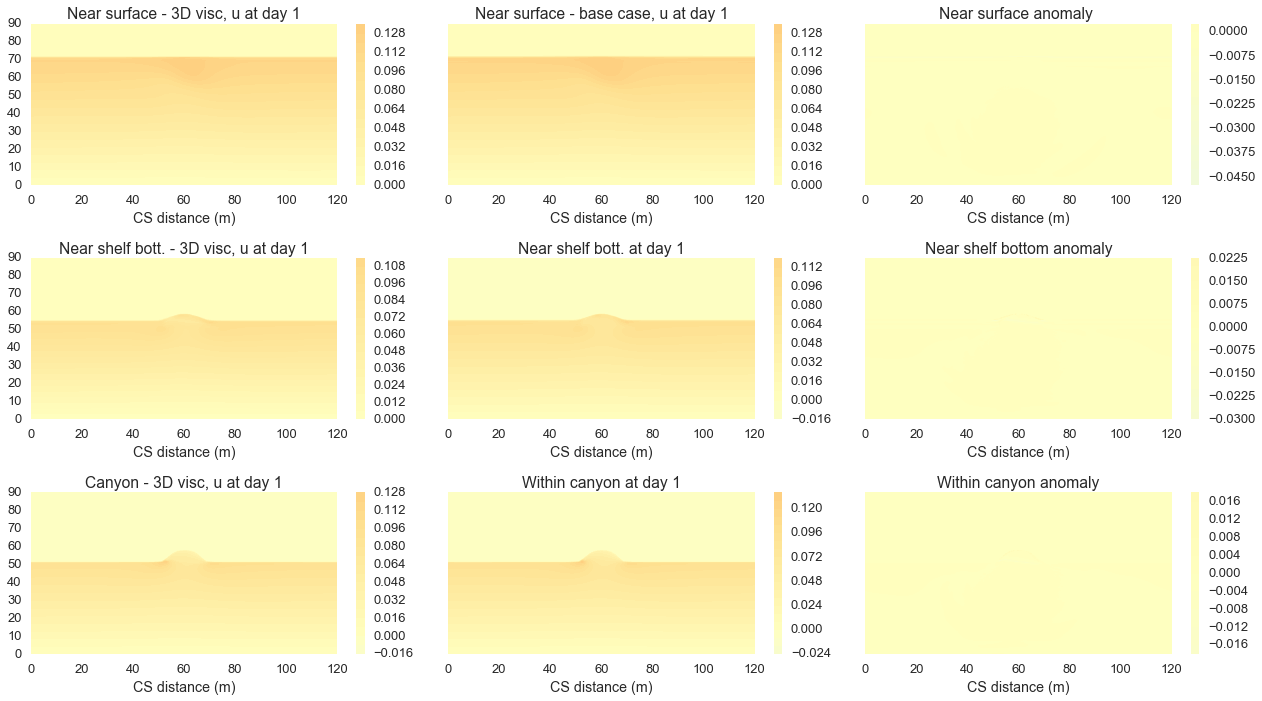

In [42]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d1,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - 3D visc, u at day 1')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d1,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - 3D visc, u at day 1')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d1,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon - 3D visc, u at day 1')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ubase_surf_d1,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface - base case, u at day 1')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ubase_shlf_d1,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 1')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ubase_cny_d1,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 1')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d1.data-ubase_surf_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d1.data-ubase_shlf_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d1.data-ubase_cny_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

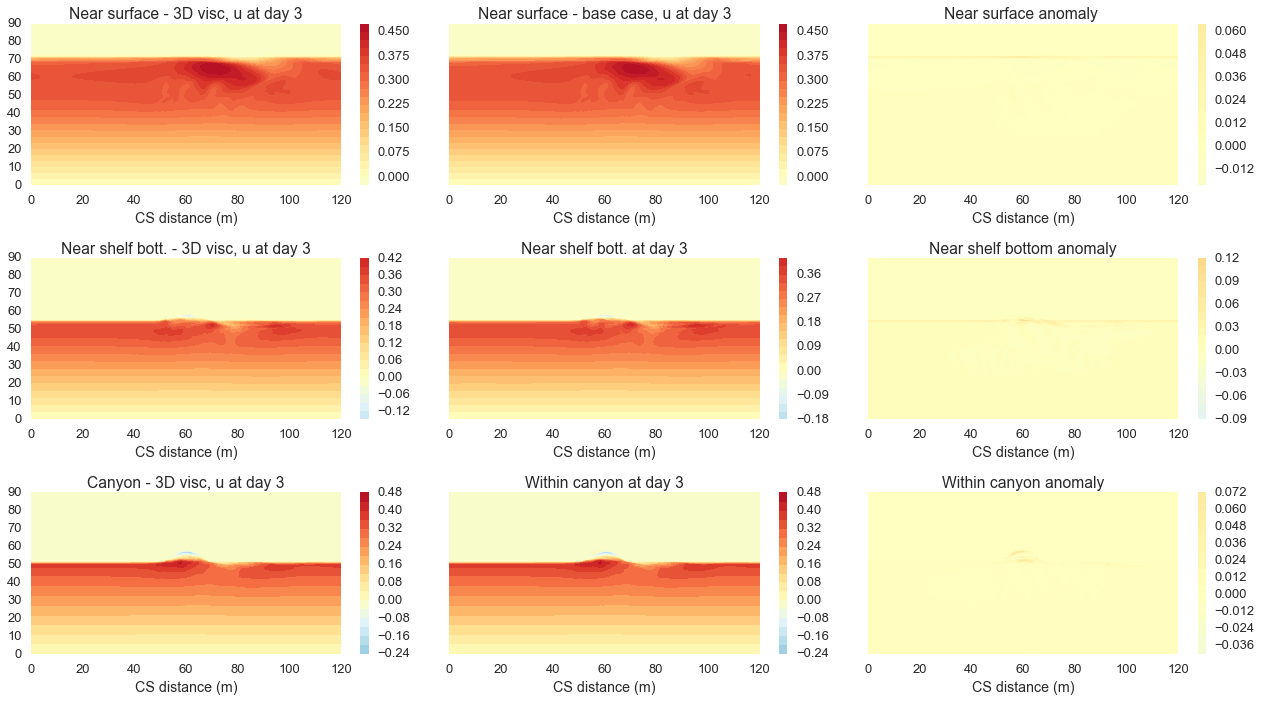

In [29]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - 3D visc, u at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - 3D visc, u at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon - 3D visc, u at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ubase_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface - base case, u at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ubase_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ubase_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d3.data-ubase_surf_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d3.data-ubase_shlf_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d3.data-ubase_cny_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

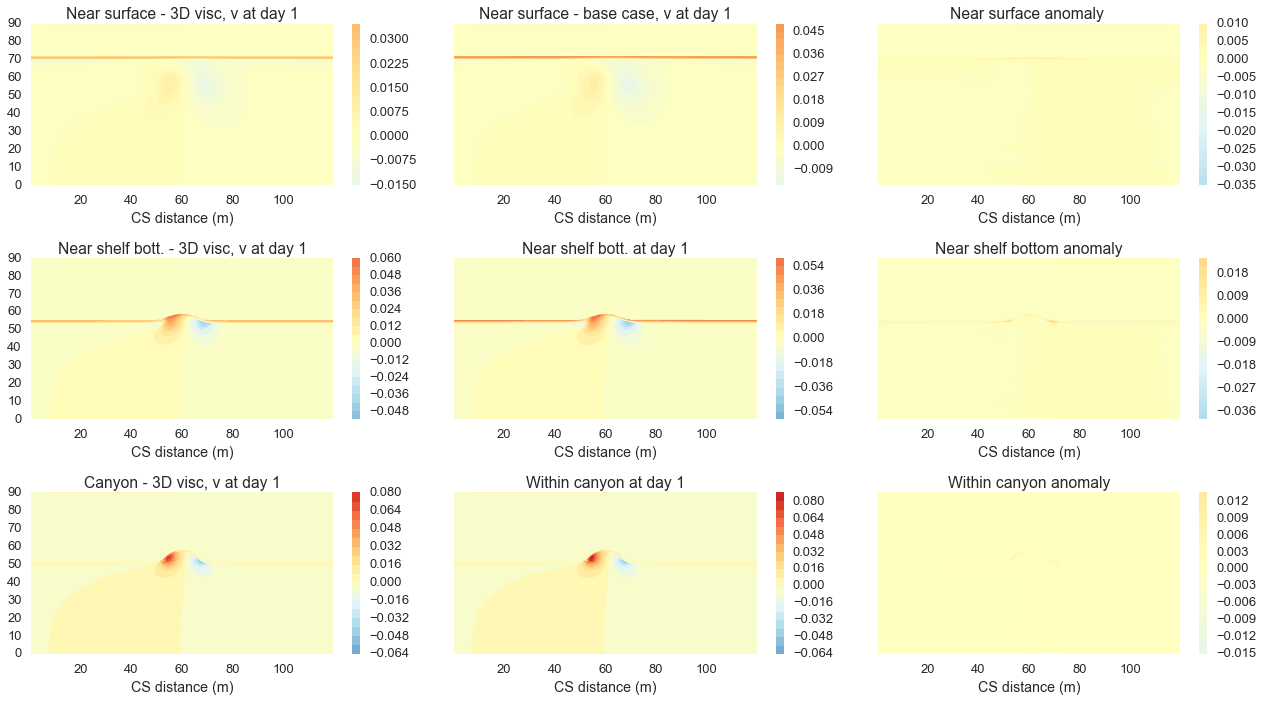

In [28]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d1,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - 3D visc, v at day 1')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d1,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - 3D visc, v at day 1')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d1,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon - 3D visc, v at day 1')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Yp1/1000,vbase_surf_d1,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface - base case, v at day 1')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Yp1/1000,vbase_shlf_d1,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 1')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Yp1/1000,vbase_cny_d1,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 1')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d1.data-vbase_surf_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d1.data-vbase_shlf_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d1.data-vbase_cny_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


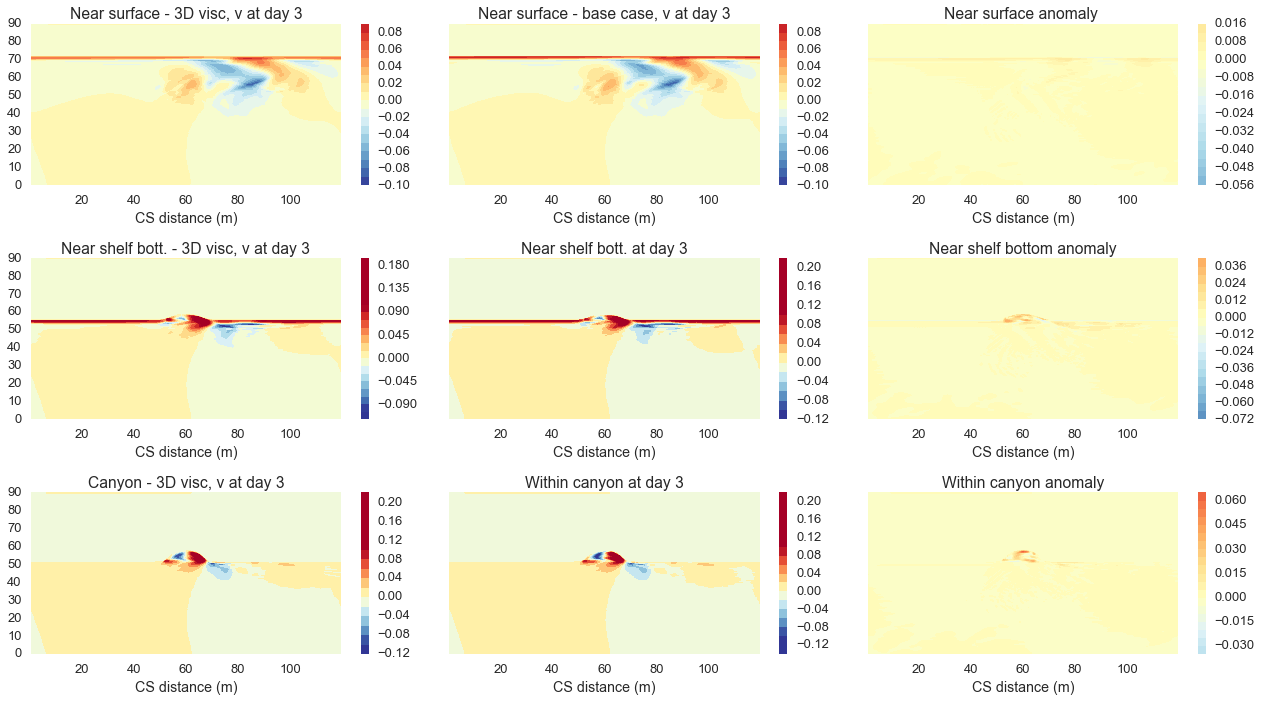

In [27]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - 3D visc, v at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - 3D visc, v at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon - 3D visc, v at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Yp1/1000,vbase_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface - base case, v at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Yp1/1000,vbase_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Yp1/1000,vbase_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d3.data-vbase_surf_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d3.data-vbase_shlf_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d3.data-vbase_cny_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.1, vmin = -0.1)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


## W

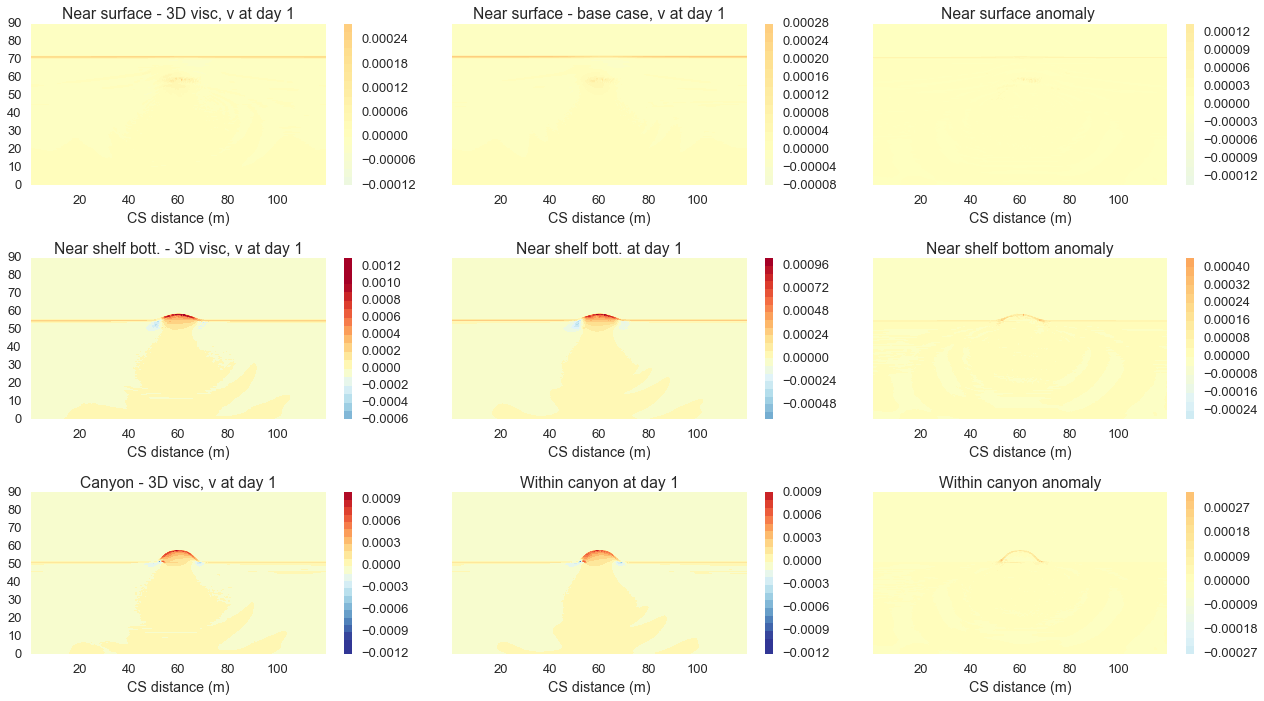

In [40]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Y/1000,w_surf_d1,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - 3D visc, v at day 1')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Y/1000,w_shlf_d1,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - 3D visc, v at day 1')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Y/1000,w_cny_d1,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon - 3D visc, v at day 1')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Y/1000,wbase_surf_d1,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface - base case, v at day 1')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Y/1000,wbase_shlf_d1,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 1')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Y/1000,wbase_cny_d1,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 1')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Y/1000,w_surf_d1.data-wbase_surf_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Y/1000,w_shlf_d1.data-wbase_shlf_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Y/1000,w_cny_d1.data-wbase_cny_d1.data,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


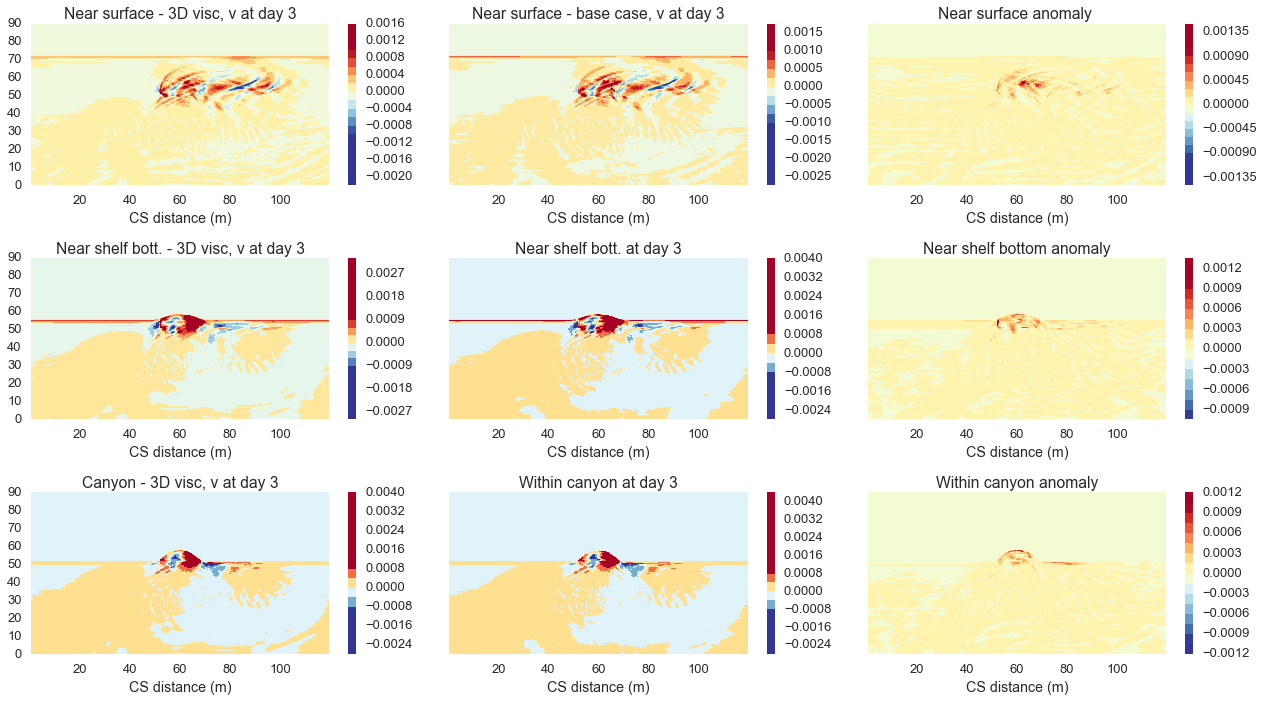

In [41]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Y/1000,w_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - 3D visc, v at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Y/1000,w_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf bott. - 3D visc, v at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Y/1000,w_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon - 3D visc, v at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Y/1000,wbase_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface - base case, v at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Y/1000,wbase_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf bott. at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Y/1000,wbase_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Within canyon at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Y/1000,w_surf_d3.data-wbase_surf_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Y/1000,w_shlf_d3.data-wbase_shlf_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf bottom anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Y/1000,w_cny_d3.data-wbase_cny_d3.data,20, cmap = 'RdYlBu_r', vmax = 0.001, vmin = -0.001)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Within canyon anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()
